## CONFOUNDERS IDENTIFICATION

In [1]:
# PACKAGE IMPORT
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


At first, we import the cleaned data.

In [2]:
# CLEANED DATA LOADING
data = pd.read_csv("data/allcolumns_80.csv")

In [3]:
data

,V1,V2,V3,V6,V8,V10,V11,V12,V13,V17,...,FARM19_5,FARM23_2,FARM23_5,V23_1,V23_2,V23_3,V23_4,ALC_TOTAL,FUM_TYPE1_YEARS,WHR
0,10001,1,4,491,57,20.0,2,5.0,5.0,491.0,...,False,False,False,False,True,False,False,1010.0,0,0.859813
1,10001,0,12,492,70,26.0,2,3.0,3.0,392.0,...,False,False,False,False,False,True,False,7.0,0,0.952381
2,10002,1,10,891,61,26.0,1,6.0,6.0,391.0,...,False,False,False,False,True,False,False,21.0,0,0.810811
3,10002,0,12,592,48,24.0,2,4.0,5.0,492.0,...,False,False,False,False,True,False,False,16.0,0,0.817518
4,10003,1,10,891,51,21.0,2,10.0,13.0,891.0,...,False,False,False,False,True,False,False,3.0,0,0.764706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,70086,0,14,294,74,19.0,3,5.0,5.0,294.0,...,False,False,False,False,False,True,False,7.0,0,NaN
5153,70087,0,14,294,69,26.0,5,7.0,7.0,194.0,...,False,False,False,False,True,False,False,1005.0,0,0.729412
5154,70088,0,14,294,70,19.0,1,5.0,NaN,294.0,...,False,False,False,False,True,False,False,7.0,0,NaN
5155,70089,0,14,294,71,20.0,2,7.0,5.0,194.0,...,False,False,False,False,True,False,False,7.0,0,0.842105


In order to identify confounders, we need to remove the diet variables from the data.

In [4]:
non_diet_var = ['V1',
 'V2',
 'V3',
 'V6',
 'V8',
 'V10',
 'V11',
 'V12',
 'V13',
 'V17',
 'V18',
 'V19',
 'V20',
 'FUM2',
 'FUM3',
 'FUM5',
 'FUM7',
 'FUM8',
 'FUM12',
 'FUM15',
 'ANTR2',
 'ANTR4',
 'ANTR6',
 'ANTR12',
 'PORP4',
 'ALC4',
 'ALC8',
 'ALC12',
 'ALC16',
 'ALC20',
 'ALC25',
 'ANAM1',
 'ANAM2',
 'ANAM3',
 'ANAM4',
 'ANAM5',
 'ANAM6',
 'ANAM7',
 'ANAM8',
 'ANAM9',
 'ANAM11',
 'ANAM12',
 'ANAM13',
 'ANAM14',
 'ANAM15',
 'ANAM16',
 'ANAM17',
 'ANAM18',
 'ANAM19',
 'ANAM20',
 'ANAM21',
 'ANAM22',
 'ANAM24',
 'ANAM25',
 'ANAM26',
 'ANAM27',
 'FAM1',
 'FAM2',
 'FAM9',
 'FAM15',
 'GIN1',
 'GIN2',
 'GIN8',
 'GIN9',
 'GIN12',
 'GIN13',
 'GIN14',
 'GIN15',
 'GIN16',
 'GIN18',
 'GIN26',
 'GIN27',

 'FARM2',
 'FARM4',
 'FARM6',
 'FARM10',
 'FARM12',
 'FARM14',
 'FARM16',
 'FARM17',
 'FARM18',
 'FARM24',
 'CENTRO_1',
 'CENTRO_2',
 'CENTRO_4',
 'CENTRO_5',
 'CENTRO_6',
 'CENTRO_7',
 'V4_1',
 'V5_1',
 'V5_2',
 'V5_3',
 'V5_4',
 'V5_5',
 'V5_6',
 'V5_7',
 'V5_8',
 'V5_9',
 'V5_10',
 'V5_11',
 'V5_12',
 'V5_13',
 'V5_15',
 'V9_1',
 'V9_2',
 'V9_3',
 'V9_4',
 'V9_5',
 'V14_1',
 'V14_2',
 'V14_3',
 'V14_4',
 'V14_5',
 'V14_6',
 'V14_7',
 'V14_8',
 'V14_9',
 'V14_30',
 'V15_1',
 'V15_2',
 'V15_3',
 'V15_4',
 'V15_5',
 'V15_6',
 'V15_7',
 'V15_8',
 'V15_9',
 'FUM10_1',
 'FUM10_2',
 'FUM10_3',
 'FUM13_1',
 'FUM13_2',
 'FUM13_3',
 'FUM13_52',
 'FUM16_1',
 'FUM16_2',
 'FUM16_3',
 'FUM17_1',
 'FUM17_2',
 'FUM17_3',
 'FAM3_1',
 'FAM3_2',
 'FAM3_3',
 'FAM3_4',
 'FAM3_5',
 'FAM3_6',
 'FAM3_7',
 'FAM3_8',
 'FAM3_9',
 'FAM4_1',
 'FAM6_155',
 'FAM6_179',
 'FAM6_185',
 'FAM6_1409',
 'FAM6_1410',
 'FAM6_1419',
 'FAM6_1420',
 'FAM6_1429',
 'FAM6_1449',
 'FAM6_1459',
 'FAM6_1460',
 'FAM6_1469',
 'FAM6_1479',
 'FAM6_1489',
 'FAM6_1490',
 'FAM6_1499',
 'FAM6_1500',
 'FAM6_1509',
 'FAM6_1510',
 'FAM6_1519',
 'FAM6_1520',
 'FAM6_1529',
 'FAM6_1533',
 'FAM6_1538',
 'FAM6_1539',
 'FAM6_1541',
 'FAM6_1543',
 'FAM6_1548',
 'FAM6_1550',
 'FAM6_1552',
 'FAM6_1560',
 'FAM6_1561',
 'FAM6_1562',
 'FAM6_1569',
 'FAM6_1579',
 'FAM6_1589',
 'FAM6_1590',
 'FAM6_1591',
 'FAM6_1599',
 'FAM6_1610',
 'FAM6_1619',
 'FAM6_1620',
 'FAM6_1622',
 'FAM6_1629',
 'FAM6_1639',
 'FAM6_1641',
 'FAM6_1643',
 'FAM6_1649',
 'FAM6_1701',
 'FAM6_1702',
 'FAM6_1704',
 'FAM6_1708',
 'FAM6_1709',
 'FAM6_1710',
 'FAM6_1715',
 'FAM6_1717',
 'FAM6_1719',
 'FAM6_1723',
 'FAM6_1726',
 'FAM6_1727',
 'FAM6_1729',
 'FAM6_1733',
 'FAM6_1739',
 'FAM6_1740',
 'FAM6_1744',
 'FAM6_1749',
 'FAM6_1790',
 'FAM6_1799',
 'FAM6_1809',
 'FAM6_1820',
 'FAM6_1828',
 'FAM6_1830',
 'FAM6_1839',
 'FAM6_1840',
 'FAM6_1844',
 'FAM6_1850',
 'FAM6_1869',
 'FAM6_1877',
 'FAM6_1879',
 'FAM6_1889',
 'FAM6_1890',
 'FAM6_1899',
 'FAM6_1906',
 'FAM6_1909',
 'FAM6_1910',
 'FAM6_1916',
 'FAM6_1919',
 'FAM6_1922',
 'FAM6_1929',
 'FAM6_1930',
 'FAM6_1949',
 'FAM6_1950',
 'FAM6_1951',
 'FAM6_1952',
 'FAM6_1953',
 'FAM6_1954',
 'FAM6_1955',
 'FAM6_1963',
 'FAM6_1969',
 'FAM6_1970',
 'FAM6_1986',
 'FAM6_1990',
 'FAM6_1991',
 'FAM6_1999',
 'FAM6_2000',
 'FAM6_2001',
 'FAM6_2008',
 'FAM6_2019',
 'FAM6_2021',
 'FAM6_2028',
 'FAM6_2029',
 'FAM6_2030',
 'FAM6_2040',
 'FAM6_2049',
 'FAM6_2059',
 'FAM6_2080',
 'FAM6_2089',
 'FAM6_2199',
 'FAM6_2389',
 'FAM6_2392',
 'FAM6_2396',
 'FAM6_2399',
 'FAM8_1',
 'FAM8_2',
 'FAM8_3',
 'FAM8_4',
 'FAM8_5',
 'FAM8_6',
 'FAM8_7',
 'FAM8_8',
 'FAM8_9',
 'FAM11_155',
 'FAM11_179',
 'FAM11_185',
 'FAM11_1409',
 'FAM11_1419',
 'FAM11_1459',
 'FAM11_1490',
 'FAM11_1499',
 'FAM11_1509',
 'FAM11_1511',
 'FAM11_1519',
 'FAM11_1529',
 'FAM11_1533',
 'FAM11_1539',
 'FAM11_1541',
 'FAM11_1550',
 'FAM11_1552',
 'FAM11_1560',
 'FAM11_1561',
 'FAM11_1579',
 'FAM11_1590',
 'FAM11_1599',
 'FAM11_1600',
 'FAM11_1610',
 'FAM11_1618',
 'FAM11_1619',
 'FAM11_1629',
 'FAM11_1649',
 'FAM11_1650',
 'FAM11_1691',
 'FAM11_1709',
 'FAM11_1719',
 'FAM11_1729',
 'FAM11_1730',
 'FAM11_1735',
 'FAM11_1736',
 'FAM11_1739',
 'FAM11_1749',
 'FAM11_1790',
 'FAM11_1799',
 'FAM11_1809',
 'FAM11_1820',
 'FAM11_1828',
 'FAM11_1830',
 'FAM11_1840',
 'FAM11_1844',
 'FAM11_1850',
 'FAM11_1860',
 'FAM11_1869',
 'FAM11_1889',
 'FAM11_1890',
 'FAM11_1899',
 'FAM11_1910',
 'FAM11_1919',
 'FAM11_1929',
 'FAM11_1930',
 'FAM11_1950',
 'FAM11_1954',
 'FAM11_1986',
 'FAM11_1990',
 'FAM11_1991',
 'FAM11_1999',
 'FAM11_2001',
 'FAM11_2008',
 'FAM11_2019',
 'FAM11_2020',
 'FAM11_2021',
 'FAM11_2028',
 'FAM11_2029',
 'FAM11_2049',
 'FAM11_2080',
 'FAM11_2089',
 'FAM13_1',
 'FAM13_2',
 'FAM13_3',
 'FAM13_4',
 'FAM13_5',
 'FAM13_6',
 'FAM13_8',
 'FAM13_9',
 'FAM14_1',
 'FAM14_2',
 'FAM16_155',
 'FAM16_1459',
 'FAM16_1469',
 'FAM16_1490',
 'FAM16_1499',
 'FAM16_1509',
 'FAM16_1515',
 'FAM16_1519',
 'FAM16_1539',
 'FAM16_1541',
 'FAM16_1550',
 'FAM16_1552',
 'FAM16_1579',
 'FAM16_1590',
 'FAM16_1591',
 'FAM16_1599',
 'FAM16_1619',
 'FAM16_1622',
 'FAM16_1629',
 'FAM16_1649',
 'FAM16_1701',
 'FAM16_1709',
 'FAM16_1729',
 'FAM16_1739',
 'FAM16_1749',
 'FAM16_1790',
 'FAM16_1809',
 'FAM16_1820',
 'FAM16_1830',
 'FAM16_1850',
 'FAM16_1889',
 'FAM16_1890',
 'FAM16_1899',
 'FAM16_1910',
 'FAM16_1919',
 'FAM16_1951',
 'FAM16_1990',
 'FAM16_1991',
 'FAM16_2019',
 'FAM16_2029',
 'FAM16_2080',
 'FAM16_2089',
 'FAM18_1',
 'FAM18_2',
 'FAM18_3',
 'FAM18_4',
 'FAM18_6',
 'FAM18_9',
 'FAM19_1',
 'FAM21_1469',
 'FAM21_1499',
 'FAM21_1509',
 'FAM21_1519',
 'FAM21_1552',
 'FAM21_1590',
 'FAM21_1610',
 'FAM21_1619',
 'FAM21_1629',
 'FAM21_1709',
 'FAM21_1749',
 'FAM21_1790',
 'FAM21_1850',
 'FAM21_1889',
 'FAM21_1890',
 'FAM21_1910',
 'FAM21_1919',
 'FAM21_2029',
 'FAM21_2089',
 'FAM23_0',
 'FAM23_3',
 'FAM23_5',
 'FAM23_6',
 'FAM26_1519',
 'FAM26_1729',
 'FAM26_1749',
 'FAM26_1991',
 'FAM28_5',
 'GIN3_1',
 'GIN3_2',
 'GIN3_3',
 'GIN3_4',
 'GIN3_5',
 'GIN3_6',
 'GIN3_8',
 'GIN4_1',
 'GIN4_2',
 'GIN4_3',
 'GIN6_1',
 'GIN6_2',
 'GIN6_3',
 'GIN6_4',
 'GIN11_1',
 'GIN11_2',
 'GIN11_3',
 'GIN11_4',
 'GIN19_0',
 'GIN19_1',
 'GIN19_2',
 'GIN19_3',
 'GIN19_4',
 'GIN19_5',
 'GIN19_6',
 'GIN19_7',
 'GIN19_8',
 'GIN20_0',
 'GIN20_1',
 'GIN20_2',
 'GIN20_3',
 'GIN20_4',
 'GIN20_5',
 'GIN20_6',
 'GIN20_7',
 'GIN20_8',
 'GIN21_0',
 'GIN21_1',
 'GIN21_2',
 'GIN21_3',
 'GIN21_4',
 'GIN21_5',
 'GIN21_6',
 'GIN21_7',
 'GIN21_8',
 'GIN22_0',
 'GIN22_1',
 'GIN22_2',
 'GIN22_3',
 'GIN22_4',
 'GIN22_5',
 'GIN22_6',
 'GIN22_7',
 'GIN22_8',
 'GIN23_0',
 'GIN23_1',
 'GIN23_2',
 'GIN23_3',
 'GIN23_4',
 'GIN23_5',
 'GIN23_6',
 'GIN23_8',
 'GIN24_0',
 'GIN24_1',
 'GIN24_2',
 'GIN24_3',
 'GIN24_4',
 'GIN24_5',
 'GIN24_6',
 'GIN24_8',
 'GIN25_0',
 'GIN25_1',
 'GIN25_2',
 'GIN25_3',
 'GIN25_4',
 'GIN25_6',
 'GIN25_8',
 'GIN28_1',
 'GIN28_2',
 'GIN28_3',
 'GIN28_4',
 'GIN28_8',
 'FARM3_1',
 'FARM3_2',
 'FARM3_3',
 'FARM3_4',
 'FARM3_5',
 'FARM3_6',
 'FARM3_7',
 'FARM3_8',
 'FARM3_9',
 'FARM7_0',
 'FARM7_1',
 'FARM7_2',
 'FARM7_3',
 'FARM7_4',
 'FARM7_5',
 'FARM7_6',
 'FARM7_7',
 'FARM7_8',
 'FARM11_1',
 'FARM11_2',
 'FARM11_3',
 'FARM11_4',
 'FARM11_5',
 'FARM11_6',
 'FARM11_7',
 'FARM11_8',
 'FARM15_0',
 'FARM15_1',
 'FARM15_2',
 'FARM15_3',
 'FARM15_5',
 'FARM15_8',
 'FARM19_1',
 'FARM19_3',
 'FARM19_5',
 'FARM19_8',
 'FARM23_2',
 'FARM23_5',
 'V23_1',
 'V23_2',
 'V23_3',
 'V23_4',
 'ALC_TOTAL',
 'FUM_TYPE1_YEARS',
 'PRE_BMI',
 'WHR',
 'AVG_USUAL_WEIGHT']

In [5]:
# REMOVING DIET VARIABLES
diet_vars = [
    # Fats
    'COND1_1', 'COND1_2', 'COND1_3', 'COND1_4', 'COND1_5', 'COND1_6', 'COND1_7',
    'COND2_1', 'COND2_2', 'COND2_3', 'COND2_5', 'COND2_6', 'COND2_8',
    'COND3_1', 'COND3_2', 'COND3_3', 'COND3_4', 'COND3_5', 'COND3_6', 'COND3_7', 'COND3_8',
    'COND4_1', 'COND4_2', 'COND4_3', 'COND4_4', 'COND4_5', 'COND4_6', 'COND4_7', 'COND4_8',
    'COND5_1', 'COND5_2', 'COND5_3', 'COND5_4', 'COND5_5', 'COND5_6', 'COND5_7', 'COND5_8',
    'COND6_1', 'COND6_2', 'COND6_3', 'COND6_4', 'COND6_5', 'COND6_6', 'COND6_7', 'COND6_8',
    'COND7_1', 'COND7_2', 'COND7_3', 'COND7_4', 'COND7_5', 'COND7_6', 'COND7_7', 'COND7_8',
    'COND8_1', 'COND8_2', 'COND8_3', 'COND8_4', 'COND8_5', 'COND8_6', 'COND8_7', 'COND8_8',
    'COND9_1', 'COND9_2', 'COND9_3', 'COND9_4', 'COND9_5', 'COND9_6', 'COND9_7', 'COND9_8',
    'COND10_1', 'COND10_2', 'COND10_3', 'COND10_4', 'COND10_5', 'COND10_6', 'COND10_7', 'COND10_8',
    'COND11_2', 'COND11_3',
    'COND12_2', 'COND12_3',
    'COND13_2', 'COND13_3',
    'COND14_1', 'COND14_3',
    'COND15_2',
    'COND16_1', 'COND16_2', 'COND16_3',
    'COND17_2', 'COND17_3',

    # Transversal Alimentary Habits
    'PASTI1', 'PASTI2',

    # Milk
    'ALI1', 'ALI2', 'ALI3', 'ALI4', 'ALI5',

    # Meat, eggs, salumi
    'ALI26', 'ALI27', 'ALI28', 'ALI29', 'ALI30', 'ALI31', 'ALI32', 'ALI33',
    'ALI34', 'ALI35', 'ALI36', 'ALI37', 'ALI38',

    # Fish
    'ALI39', 'ALI40', 'ALI41',

    # Vegetables
    'ALI45', 'ALI46', 'ALI47', 'ALI48', 'ALI49', 'ALI50', 'ALI51',
    'ALI54', 'ALI55', 'ALI56', 'ALI57',

    # Fruits
    'ALI58', 'ALI59', 'ALI60', 'ALI61', 'ALI62', 'ALI63', 'ALI64', 'ALI65',
    'ALI66', 'ALI67', 'ALI68', 'ALI69',

    # Sweets and Beverages
    'ALI70', 'ALI71', 'ALI72', 'ALI73', 'ALI74', 'ALI75', 'ALI76', 'ALI77', 'ALI78'
]


#cleaned_vars_raw = """V1,V2,V3,V6,V8,V10,V11,V12,V13,V17,V18,V19,V20,FUM2,FUM3,FUM5,FUM7,FUM8,FUM12,FUM15,ANTR2,ANTR4,ANTR6,ANTR12,PORP4,ALC4,ALC8,ALC12,ALC16,ALC20,ALC25,ANAM1,ANAM2,ANAM3,ANAM4,ANAM5,ANAM6,ANAM7,ANAM8,ANAM9,ICDAN10,ANAM11,ANAM12,ANAM13,ANAM14,ANAM15,ANAM16,ANAM17,ANAM18,ANAM19,ANAM20,ANAM21,ANAM22,ANAM23,ANAM24,ANAM25,ANAM26,ANAM27,FAM1,FAM2,FAM9,FAM10,FAM15,FAM22,FAM30,GIN1,GIN2,GIN8,GIN9,GIN10,GIN13,GIN14,GIN15,GIN18,GIN26,GIN27,FARM1,FARM2,FARM4,FARM6,FARM8,FARM10,FARM12,FARM14,FARM17,FARM18,FARM24,NUT13,NUT21,NUT26,NUT28,NUT29,NUT31,NUT36,NUT42,NUT43,NUT45,NUT47,NUT48,NUT49,NUT52,CENTRO_1,CENTRO_2,CENTRO_3,CENTRO_4,CENTRO_5,CENTRO_6,CENTRO_7,V4_1,V5_1,V5_2,V5_3,V5_4,V5_5,V5_6,V5_7,V5_8,V5_9,V5_10,V5_11,V5_12,V5_13,V5_15,V9_1,V9_2,V9_3,V9_4,V9_5,V14_1,V14_2,V14_3,V14_4,V14_5,V14_6,V14_7,V14_8,V14_9,V14_30,V15_1,V15_2,V15_3,V15_4,V15_5,V15_6,V15_7,V15_8,V15_9,FUM10_1,FUM10_2,FUM10_3,FUM13_1,FUM13_2,FUM13_3,FUM13_7,FUM13_52,FUM16_1,FUM16_2,FUM16_3,FUM17_1,FUM17_2,FUM17_3,FAM3_0,FAM3_1,FAM3_2,FAM3_3,FAM3_4,FAM3_5,FAM3_6,FAM3_7,FAM3_8,FAM3_9,FAM4_1,FAM6_155,FAM6_179,FAM6_185,FAM6_1409,FAM6_1410,FAM6_1419,FAM6_1420,FAM6_1429,FAM6_1449,FAM6_1459,FAM6_1460,FAM6_1469,FAM6_1479,FAM6_1489,FAM6_1490,FAM6_1499,FAM6_1500,FAM6_1509,FAM6_1510,FAM6_1519,FAM6_1520,FAM6_1529,FAM6_1533,FAM6_1538,FAM6_1539,FAM6_1541,FAM6_1543,FAM6_1548,FAM6_1550,FAM6_1552,FAM6_1560,FAM6_1561,FAM6_1562,FAM6_1569,FAM6_1579,FAM6_1589,FAM6_1590,FAM6_1591,FAM6_1599,FAM6_1610,FAM6_1619,FAM6_1620,FAM6_1622,FAM6_1629,FAM6_1639,FAM6_1641,FAM6_1643,FAM6_1649,FAM6_1701,FAM6_1702,FAM6_1704,FAM6_1708,FAM6_1709,FAM6_1710,FAM6_1715,FAM6_1717,FAM6_1719,FAM6_1723,FAM6_1726,FAM6_1727,FAM6_1729,FAM6_1733,FAM6_1739,FAM6_1740,FAM6_1744,FAM6_1749,FAM6_1790,FAM6_1799,FAM6_1809,FAM6_1820,FAM6_1828,FAM6_1830,FAM6_1839,FAM6_1840,FAM6_1844,FAM6_1850,FAM6_1869,FAM6_1877,FAM6_1879,FAM6_1889,FAM6_1890,FAM6_1899,FAM6_1906,FAM6_1909,FAM6_1910,FAM6_1916,FAM6_1919,FAM6_1922,FAM6_1929,FAM6_1930,FAM6_1949,FAM6_1950,FAM6_1951,FAM6_1952,FAM6_1953,FAM6_1954,FAM6_1955,FAM6_1963,FAM6_1969,FAM6_1970,FAM6_1986,FAM6_1990,FAM6_1991,FAM6_1999,FAM6_2000,FAM6_2001,FAM6_2008,FAM6_2019,FAM6_2021,FAM6_2028,FAM6_2029,FAM6_2030,FAM6_2040,FAM6_2049,FAM6_2059,FAM6_2080,FAM6_2089,FAM6_2199,FAM6_2389,FAM6_2392,FAM6_2396,FAM6_2399,FAM8_1,FAM8_2,FAM8_3,FAM8_4,FAM8_5,FAM8_6,FAM8_7,FAM8_8,FAM8_9,FAM11_155,FAM11_179,FAM11_185,FAM11_1409,FAM11_1419,FAM11_1459,FAM11_1490,FAM11_1499,FAM11_1509,FAM11_1511,FAM11_1519,FAM11_1529,FAM11_1533,FAM11_1539,FAM11_1541,FAM11_1550,FAM11_1552,FAM11_1560,FAM11_1561,FAM11_1579,FAM11_1590,FAM11_1599,FAM11_1600,FAM11_1610,FAM11_1618,FAM11_1619,FAM11_1629,FAM11_1649,FAM11_1650,FAM11_1691,FAM11_1709,FAM11_1719,FAM11_1729,FAM11_1730,FAM11_1735,FAM11_1736,FAM11_1739,FAM11_1749,FAM11_1790,FAM11_1799,FAM11_1809,FAM11_1820,FAM11_1828,FAM11_1830,FAM11_1840,FAM11_1844,FAM11_1850,FAM11_1860,FAM11_1869,FAM11_1889,FAM11_1890,FAM11_1899,FAM11_1910,FAM11_1919,FAM11_1929,FAM11_1930,FAM11_1950,FAM11_1954,FAM11_1986,FAM11_1990,FAM11_1991,FAM11_1999,FAM11_2001,FAM11_2008,FAM11_2019,FAM11_2020,FAM11_2021,FAM11_2028,FAM11_2029,FAM11_2049,FAM11_2080,FAM11_2089,FAM13_1,FAM13_2,FAM13_3,FAM13_4,FAM13_5,FAM13_6,FAM13_8,FAM13_9,FAM14_1,FAM16_155,FAM16_1459,FAM16_1469,FAM16_1490,FAM16_1499,FAM16_1509,FAM16_1515,FAM16_1519,FAM16_1539,FAM16_1541,FAM16_1550,FAM16_1552,FAM16_1579,FAM16_1590,FAM16_1591,FAM16_1599,FAM16_1619,FAM16_1622,FAM16_1629,FAM16_1649,FAM16_1701,FAM16_1709,FAM16_1729,FAM16_1739,FAM16_1749,FAM16_1790,FAM16_1809,FAM16_1820,FAM16_1830,FAM16_1850,FAM16_1889,FAM16_1890,FAM16_1899,FAM16_1910,FAM16_1919,FAM16_1951,FAM16_1990,FAM16_1991,FAM16_2019,FAM16_2029,FAM16_2080,FAM16_2089,FAM18_1,FAM18_2,FAM18_3,FAM18_4,FAM18_6,FAM18_9,FAM19_1,FAM21_1469,FAM21_1499,FAM21_1509,FAM21_1519,FAM21_1552,FAM21_1590,FAM21_1610,FAM21_1619,FAM21_1629,FAM21_1709,FAM21_1749,FAM21_1790,FAM21_1850,FAM21_1889,FAM21_1890,FAM21_1910,FAM21_1919,FAM21_2029,FAM21_2089,FAM23_0,FAM23_3,FAM23_5,FAM23_6,FAM26_1519,FAM26_1729,FAM26_1749,FAM26_1991,FAM28_5,GIN3_1,GIN3_2,GIN3_3,GIN3_4,GIN3_5,GIN3_6,GIN3_8,GIN4_1,GIN4_2,GIN6_1,GIN6_3,GIN6_4,GIN11_1,GIN11_2,GIN11_3,GIN11_4,GIN19_0,GIN19_1,GIN19_2,GIN19_3,GIN19_4,GIN19_5,GIN19_6,GIN19_7,GIN19_8,GIN20_0,GIN20_1,GIN20_2,GIN20_3,GIN20_4,GIN20_5,GIN20_6,GIN20_7,GIN20_8,GIN21_1,GIN21_2,GIN21_3,GIN21_4,GIN21_5,GIN21_6,GIN21_7,GIN21_8,GIN22_1,GIN22_2,GIN22_3,GIN22_4,GIN22_5,GIN22_6,GIN22_7,GIN22_8,GIN23_0,GIN23_1,GIN23_2,GIN23_3,GIN23_4,GIN23_5,GIN23_6,GIN23_8,GIN24_0,GIN24_1,GIN24_2,GIN24_3,GIN24_4,GIN24_5,GIN24_6,GIN24_8,GIN25_1,GIN25_2,GIN25_3,GIN25_4,GIN25_6,GIN25_8,GIN28_1,GIN28_2,GIN28_3,GIN28_4,GIN28_8,FARM3_1,FARM3_2,FARM3_3,FARM3_4,FARM3_5,FARM3_6,FARM3_7,FARM3_8,FARM3_9,FARM7_0,FARM7_1,FARM7_2,FARM7_3,FARM7_4,FARM7_5,FARM7_6,FARM7_7,FARM7_8,FARM11_1,FARM11_2,FARM11_3,FARM11_4,FARM11_5,FARM11_6,FARM11_7,FARM11_8,FARM15_0,FARM15_1,FARM15_2,FARM15_3,FARM15_5,FARM15_8,FARM19_1,FARM19_3,FARM23_2,FARM23_5,V23_1,V23_2,V23_3,V23_4,ALC_TOTAL,FUM_TYPE1_YEARS,PRE_BMI,WHR,AVG_USUAL_WEIGHT"""

In [6]:
cleaned_vars = list(data.columns)
diet_expanded = set()

for var in diet_vars:
    diet_expanded.add(var)
    diet_expanded.update({v for v in cleaned_vars if v.startswith(var + "_")})

# List of all diet variables based on cleaned data
adjusted_diet_vars = sorted(list(diet_expanded))
adjusted_diet_vars = [col.upper() for col in adjusted_diet_vars]

### Selection of Non-Diet Variables

This is the list of all diet variables in the data:

We now remove all diet-related variables from the dataset.

In [7]:
# CREATE A DATAFRAME WITH ALL VARIABLES EXCEPT DIET-RELATED
existing_cols = [col for col in non_diet_var if col in data.columns]
non_diet_data = data.drop(columns=diet_vars).copy()
non_diet_data


,V1,V2,V3,V6,V8,V10,V11,V12,V13,V17,...,FARM19_5,FARM23_2,FARM23_5,V23_1,V23_2,V23_3,V23_4,ALC_TOTAL,FUM_TYPE1_YEARS,WHR
0,10001,1,4,491,57,20.0,2,5.0,5.0,491.0,...,False,False,False,False,True,False,False,1010.0,0,0.859813
1,10001,0,12,492,70,26.0,2,3.0,3.0,392.0,...,False,False,False,False,False,True,False,7.0,0,0.952381
2,10002,1,10,891,61,26.0,1,6.0,6.0,391.0,...,False,False,False,False,True,False,False,21.0,0,0.810811
3,10002,0,12,592,48,24.0,2,4.0,5.0,492.0,...,False,False,False,False,True,False,False,16.0,0,0.817518
4,10003,1,10,891,51,21.0,2,10.0,13.0,891.0,...,False,False,False,False,True,False,False,3.0,0,0.764706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,70086,0,14,294,74,19.0,3,5.0,5.0,294.0,...,False,False,False,False,False,True,False,7.0,0,NaN
5153,70087,0,14,294,69,26.0,5,7.0,7.0,194.0,...,False,False,False,False,True,False,False,1005.0,0,0.729412
5154,70088,0,14,294,70,19.0,1,5.0,NaN,294.0,...,False,False,False,False,True,False,False,7.0,0,NaN
5155,70089,0,14,294,71,20.0,2,7.0,5.0,194.0,...,False,False,False,False,True,False,False,7.0,0,0.842105


### Dealing with Missing Values

We checked for missing values in the data and decided how to handle them.

This preprocessing step is implemented now because we want to adapt data usage to the LASSO model.

In [8]:
null_counts = non_diet_data.isnull().sum()
null_counts_sorted = null_counts.sort_values(ascending=False)
columns_with_nulls = null_counts[null_counts > 0].sort_values(ascending=False)
columns_with_nulls

FAM9      4467
FARM4      932
WHR        568
ANTR4      565
ALI25      232
          ... 
ANAM12       1
ANAM14       1
ANAM18       1
ANAM27       1
ANAM7        1
Length: 100, dtype: int64


We decided to drop the variable `FAM9` and `FARM4` because they have too many missing values.

The others will be imputed using the median.

In [9]:
non_diet_data.drop(columns=['FAM9', 'FARM4'])

,V1,V2,V3,V6,V8,V10,V11,V12,V13,V17,...,FARM19_5,FARM23_2,FARM23_5,V23_1,V23_2,V23_3,V23_4,ALC_TOTAL,FUM_TYPE1_YEARS,WHR
0,10001,1,4,491,57,20.0,2,5.0,5.0,491.0,...,False,False,False,False,True,False,False,1010.0,0,0.859813
1,10001,0,12,492,70,26.0,2,3.0,3.0,392.0,...,False,False,False,False,False,True,False,7.0,0,0.952381
2,10002,1,10,891,61,26.0,1,6.0,6.0,391.0,...,False,False,False,False,True,False,False,21.0,0,0.810811
3,10002,0,12,592,48,24.0,2,4.0,5.0,492.0,...,False,False,False,False,True,False,False,16.0,0,0.817518
4,10003,1,10,891,51,21.0,2,10.0,13.0,891.0,...,False,False,False,False,True,False,False,3.0,0,0.764706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,70086,0,14,294,74,19.0,3,5.0,5.0,294.0,...,False,False,False,False,False,True,False,7.0,0,NaN
5153,70087,0,14,294,69,26.0,5,7.0,7.0,194.0,...,False,False,False,False,True,False,False,1005.0,0,0.729412
5154,70088,0,14,294,70,19.0,1,5.0,NaN,294.0,...,False,False,False,False,True,False,False,7.0,0,NaN
5155,70089,0,14,294,71,20.0,2,7.0,5.0,194.0,...,False,False,False,False,True,False,False,7.0,0,0.842105


Missing value for diet variables for LCA 

In [10]:
diet_data= data[diet_vars].copy()

- Dropped **PASTI2** due to excessive missing values.  
- For **PASTI1** and the **ALI\*** variables, replaced special codes (`9`, `98`, `99`) with `NaN` and applied median imputation, resulting in a fully populated dataset.

In [11]:
# Drop PASTI2
diet_data = diet_data.drop(columns='PASTI2')

# Handle PASTI1: 1–8 valid, 9 → missing → imputa con mediana
diet_data['PASTI1'] = (
    diet_data['PASTI1']
      .replace(9, np.nan)
      .fillna(diet_data['PASTI1'].median())
)
#Handle ALI* variables (0–97 valid; 98=occasional, 99=missing →  mediana)
ali_vars = [
    'ALI68','ALI67','ALI64','ALI62','ALI61','ALI60','ALI59',
    'ALI58','ALI63','ALI65','ALI66','ALI69','ALI56','ALI38','ALI1'
]

# replace 98 and 99 with NaN
diet_data[ali_vars] = diet_data[ali_vars].replace({98: np.nan, 99: np.nan})

# median imputation per column
for col in ali_vars:
    diet_data[col] = diet_data[col].fillna(diet_data[col].median())

In [12]:
diet_data

,COND1_1,COND1_2,COND1_3,COND1_4,COND1_5,COND1_6,COND1_7,COND2_1,COND2_2,COND2_3,...,ALI69,ALI70,ALI71,ALI72,ALI73,ALI74,ALI75,ALI76,ALI77,ALI78
0,False,False,True,False,False,False,False,False,False,False,...,2.0,98.0,4.0,98.0,1.0,0.0,0.0,14.0,7.0,4.0
1,False,False,False,False,True,False,False,False,False,False,...,1.0,0.0,0.0,0.0,98.0,98.0,0.0,0.0,0.0,98.0
2,False,True,False,False,False,False,False,False,False,False,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,False,False,True,False,False,False,False,False,False,False,...,1.0,0.0,7.0,0.0,1.0,1.0,28.0,70.0,28.0,2.0
4,False,True,False,False,False,False,False,False,False,False,...,1.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,False,False,True,False,False,False,False,False,False,False,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
5153,False,True,False,False,False,False,False,False,False,False,...,2.0,0.0,0.0,0.0,0.0,98.0,0.0,0.0,0.0,2.0
5154,False,False,True,False,False,False,False,False,False,False,...,2.0,0.0,0.0,0.0,0.0,0.0,98.0,0.0,0.0,0.0
5155,False,True,False,False,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


Check if there are missing values left

In [13]:
null_counts_d = diet_data.isnull().sum()
null_counts_sorted_d = null_counts_d.sort_values(ascending=False)
columns_with_nulls_d = null_counts_d[null_counts_d > 0].sort_values(ascending=False)
columns_with_nulls_d

Series([], dtype: int64)

### Model Training

Then, we used the `sklearn` library to implement a pipeline for the LASSO model. The process takes place in the following steps:

- **Imputation**: The missing values are imputed using the median.
- **Scaling**: The features are scaled using StandardScaler.
- **LASSO**: The LASSO model is trained using the scaled and imputed data.

The model is trained using 5-fold cross-validation and the accuracy is used as the evaluation metric.

In [14]:
# X = all non-diet variables
X = non_diet_data.drop(columns=['V2'])

# y = dependent variable (1 = case, 0 = control)
y = non_diet_data['V2']

# Pipeline: imputation + scaling + LASSO (wit 5-fold CV)
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("lasso", LogisticRegressionCV(
        penalty="l1",
        solver="saga",
        cv=5,
        max_iter=5000,
        scoring='accuracy',
        refit=True
    ))
])

# Fit
pipeline.fit(X, y)


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('lasso',
                 LogisticRegressionCV(cv=5, max_iter=5000, penalty='l1',
                                      scoring='accuracy', solver='saga'))])

### Analysis of Results

In [15]:
# Array of coefficients
lasso_model = pipeline.named_steps['lasso']
coefficients = lasso_model.coef_.ravel()

In [16]:
# Associate columns names with coefficients values
lasso_results = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': coefficients
})

# Sort by absolute value
lasso_results['AbsCoeff'] = lasso_results['Coefficient'].abs()
lasso_results_sorted = lasso_results.sort_values(by='AbsCoeff', ascending=False)
lasso_results_sorted

,Variable,Coefficient,AbsCoeff
215,V5_10,1.913796,1.913796
209,V5_4,-1.703926,1.703926
217,V5_12,-1.454311,1.454311
212,V5_7,-1.258330,1.258330
218,V5_13,1.099475,1.099475
...,...,...,...
345,PORZ30_3,0.000000,0.000000
346,PORZ31_1,0.000000,0.000000
347,PORZ31_2,0.000000,0.000000
348,PORZ31_3,0.000000,0.000000


In [17]:
# List of confounders to keep for the analysis
selected_confounders = lasso_results[lasso_results['AbsCoeff'] >= 0.04]
selected_confounders

,Variable,Coefficient,AbsCoeff
3,V8,0.060754,0.060754
5,V11,-0.085454,0.085454
6,V12,0.083513,0.083513
7,V13,0.081869,0.081869
8,V17,-0.057820,0.057820
...,...,...,...
764,GIN6_1,0.043030,0.043030
780,GIN19_8,-0.093152,0.093152
867,V23_1,0.084744,0.084744
870,V23_4,-0.041219,0.041219


In [18]:
selected_confounders.describe()

,Coefficient,AbsCoeff
count,65.000000,65.000000
mean,-0.024223,0.232508
std,0.462298,0.399262
min,-1.703926,0.040991
25%,-0.084006,0.054247
50%,-0.048070,0.082123
75%,0.068309,0.112889
max,1.913796,1.913796


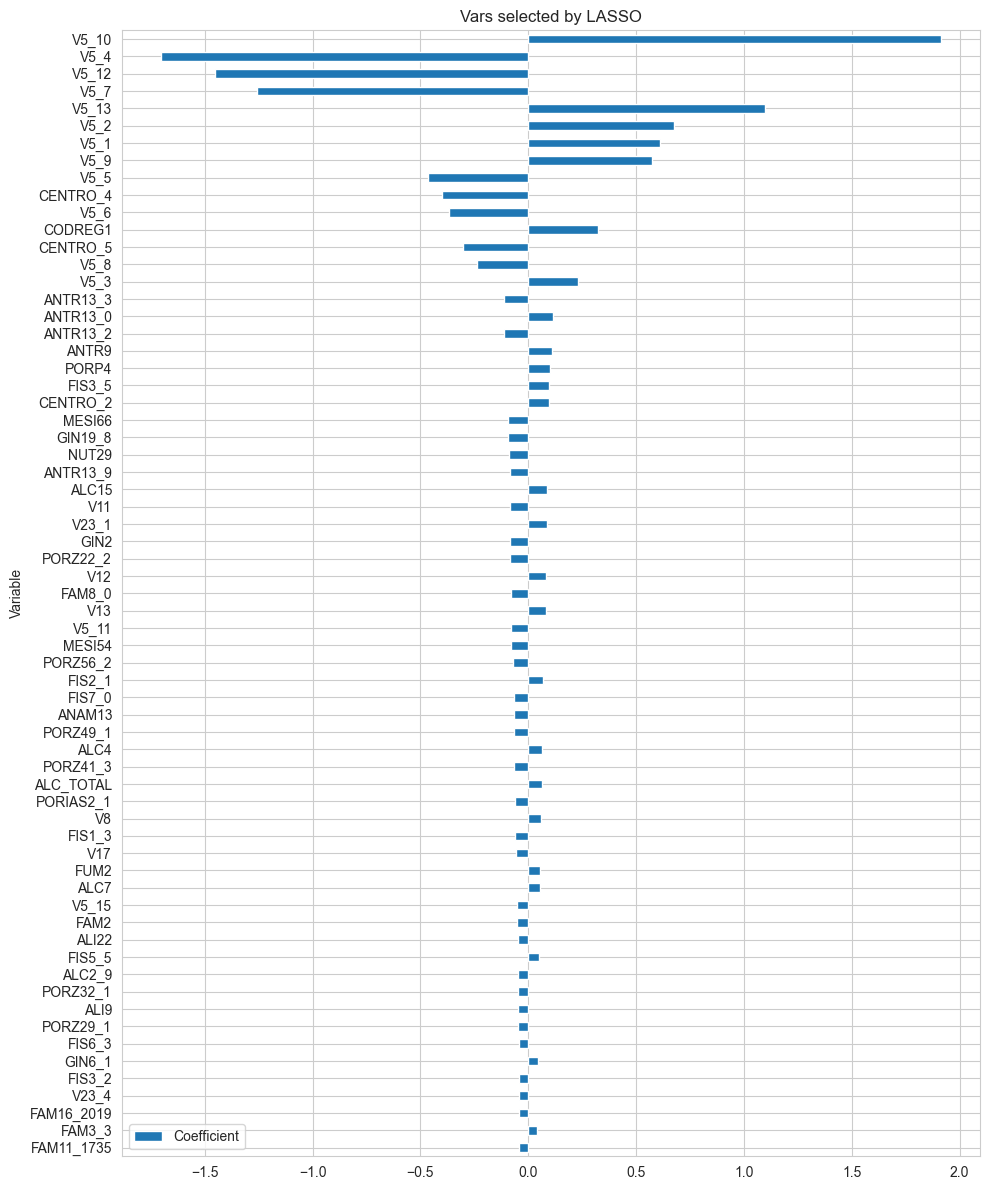

In [19]:
selected_confounders.sort_values('AbsCoeff', ascending=True).plot(
    x='Variable', y='Coefficient', kind='barh', figsize=(10, 12))
plt.title("Vars selected by LASSO")
plt.tight_layout()
plt.show()


## IDENTIFY DIET AS OVERALL EXPOSURE

### Variables Included in the Analysis

The following variables were selected to globally represent each participant's dietary pattern, taking into account weekly consumption habits, types of foods, and cooking practices.

#### Type of Fats and General Eating Habits
- `cond1–cond10`: Type of fat used for dressing salads, cooking vegetables and meat, and seasoning pasta or rice.
- `cond11–cond17`: Self-reported fat consumption, habits related to trimming fat from meats, salt addition, garlic use, and plate-leaving behaviors.
- `pasti2`: Number of main meals and snacks per day.

#### Milk and Dairy Products
- `ali1–ali5`: Weekly intake of milk (whole, skimmed), yogurt, cappuccino.

#### Meat, Processed Meats, and Eggs
- `ali26–ali38`: Weekly intake of eggs, poultry, red meat, and processed meats (e.g., ham, salami).

#### Fish
- `ali39–ali41`: Weekly intake of fish (boiled, fried, or canned).

#### Legumes and Vegetables
- `ali45–ali51`, `ali54–ali57`: Weekly intake of legumes and a variety of cooked and raw vegetables.

#### Fruit
- `ali58–ali69`: Weekly intake of fresh, seasonal, or canned fruit, along with fruit juices and jams.

#### Sweets and Sugary Beverages
- `ali70–ali78`: Weekly intake of biscuits, pastries, chocolate, candies, ice cream, and soft drinks.

---

All variables were chosen for their ability to reflect substantial differences in dietary behavior. Each variable will be recoded into categorical or ordinal variables (e.g., low/medium/high) to be suitable for the LCA modeling framework.


# LCA

POMEGRANATE IMPLEMENTATION

In [20]:
from pomegranate.distributions import (
    PoissonDistribution,
    BernoulliDistribution,
    IndependentComponentsDistribution
)
from pomegranate.gmm import GeneralMixtureModel

ModuleNotFoundError: No module named 'pomegranate'

SCRATCH

In [96]:
from scipy.special import logsumexp

In [97]:
class LatentClassAnalysis:
    # Initialize model with number of classes, variable types, EM settings
    def __init__(self, n_classes, var_types, max_iter=200, tol=1e-6, random_state=None):
        """
        var_types: list of 'bernoulli' or 'poisson' for each column of X
        """
        self.n_classes = n_classes
        self.var_types = var_types
        self.max_iter  = max_iter
        self.tol       = tol
        self.rng       = np.random.RandomState(random_state)

    # Randomly initialize class priors and per-class parameters (p or λ)
    def _initialize(self, X):
        n, d = X.shape
        self.pi = np.full(self.n_classes, 1/self.n_classes)
        self.params = np.zeros((self.n_classes, d))
        for j, t in enumerate(self.var_types):
            col = X[:, j]
            if t == 'bernoulli':
                m = col.mean()
                perturb = self.rng.normal(m, 0.1, size=self.n_classes)
                self.params[:, j] = np.clip(perturb, 1e-3, 1-1e-3)
            else:  # poisson
                m = col.mean()
                perturb = self.rng.normal(m, m*0.2 + 1e-3, size=self.n_classes)
                self.params[:, j] = np.clip(perturb, 1e-3, None)

    # E-step: compute responsibilities and log-likelihood
    def _e_step(self, X):
        n, d = X.shape
        log_resp = np.zeros((n, self.n_classes))
        for k in range(self.n_classes):
            lp = 0
            for j, t in enumerate(self.var_types):
                θ = self.params[k, j]
                xj = X[:, j]
                if t == 'bernoulli':
                    lp += xj * np.log(θ) + (1 - xj) * np.log(1 - θ)
                else:  # poisson log-lik up to constant
                    lp += xj * np.log(θ) - θ
            log_resp[:, k] = np.log(self.pi[k]) + lp

        log_norm = logsumexp(log_resp, axis=1, keepdims=True)
        resp     = np.exp(log_resp - log_norm)
        ll       = log_norm.sum()
        return resp, ll

    # M-step: update priors and per-class parameters using weighted sums
    def _m_step(self, X, resp):
        n, d = X.shape
        Nk = resp.sum(axis=0)
        self.pi = Nk / n
        for k in range(self.n_classes):
            for j, t in enumerate(self.var_types):
                weighted_sum = (resp[:, k] * X[:, j]).sum()
                if t == 'bernoulli':
                    self.params[k, j] = np.clip(weighted_sum / Nk[k], 1e-3, 1-1e-3)
                else:
                    self.params[k, j] = np.clip(weighted_sum / Nk[k], 1e-3, None)

    # Fit the LCA model to data X via EM until convergence or max_iter
    def fit(self, X):
        if hasattr(X, "values"):
            X = X.values
        X = X.astype(float)
        self._initialize(X)
        ll_old = None

        for _ in range(self.max_iter):
            resp, ll = self._e_step(X)
            self._m_step(X, resp)
            if ll_old is not None and abs(ll - ll_old) < self.tol:
                break
            ll_old = ll

        self.resp = resp
        self.ll   = ll
        return self

    # Compute Bayesian Information Criterion for model selection
    def bic(self, X):
        n, d = X.shape
        p   = (self.n_classes - 1) + self.n_classes * d
        return -2 * self.ll + p * np.log(n)

    # Compute posterior class probabilities for new data
    def predict_proba(self, X):
        if hasattr(X, "values"):
            X = X.values
        resp, _ = self._e_step(X.astype(float))
        return resp

    # Assign each sample to the class with highest posterior probability
    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

In [98]:
continuous_vars = ['PASTI1',
    'ALI1','ALI2','ALI3','ALI4','ALI5',
    'ALI26','ALI27','ALI28','ALI29','ALI30',
    'ALI31','ALI32','ALI33','ALI34','ALI35',
    'ALI36','ALI37','ALI38','ALI39','ALI40',
    'ALI41','ALI45','ALI46','ALI47','ALI48',
    'ALI49','ALI50','ALI51','ALI54','ALI55',
    'ALI56','ALI57','ALI58','ALI59','ALI60',
    'ALI61','ALI62','ALI63','ALI64','ALI65',
    'ALI66','ALI67','ALI68','ALI69','ALI70',
    'ALI71','ALI72','ALI73','ALI74','ALI75',
    'ALI76','ALI77','ALI78'
]

categorical_vars = [
    'COND1_1','COND1_2','COND1_3','COND1_4','COND1_5','COND1_6','COND1_7',
    'COND2_1','COND2_2','COND2_3','COND2_5','COND2_6','COND2_8',
    'COND3_1','COND3_2','COND3_3','COND3_4','COND3_5','COND3_6','COND3_7','COND3_8',
    'COND4_1','COND4_2','COND4_3','COND4_4','COND4_5','COND4_6','COND4_7','COND4_8',
    'COND5_1','COND5_2','COND5_3','COND5_4','COND5_5','COND5_6','COND5_7','COND5_8',
    'COND6_1','COND6_2','COND6_3','COND6_4','COND6_5','COND6_6','COND6_7','COND6_8',
    'COND7_1','COND7_2','COND7_3','COND7_4','COND7_5','COND7_6','COND7_7','COND7_8',
    'COND8_1','COND8_2','COND8_3','COND8_4','COND8_5','COND8_6','COND8_7','COND8_8',
    'COND9_1','COND9_2','COND9_3','COND9_4','COND9_5','COND9_6','COND9_7','COND9_8',
    'COND10_1','COND10_2','COND10_3','COND10_4','COND10_5','COND10_6','COND10_7','COND10_8',
    'COND11_2','COND11_3','COND12_2','COND12_3','COND13_2','COND13_3',
    'COND14_1','COND14_3','COND15_2','COND16_1','COND16_2','COND16_3',
    'COND17_2','COND17_3'
]


In [100]:
# data matrix and var_types
X = diet_data[continuous_vars + categorical_vars]

var_types = ['poisson'] * len(continuous_vars) \
          + ['bernoulli'] * len(categorical_vars)

In [101]:
# 2) Fit for a range of K and pick by BIC
bics, models = [], []
for K in range(3,8):
    m = LatentClassAnalysis(K, var_types, random_state=42)
    m.fit(X)
    bics.append(m.bic(X))
    models.append(m)
    print(f"K={K} → BIC = {bics[-1]:.1f}")

best = np.argmin(bics) + 2
print("Optimal K =", best)
best_model = models[best-2]

K=3 → BIC = -14475142.3
K=4 → BIC = -14702127.2
K=5 → BIC = -14862271.1
K=6 → BIC = -14966944.5
K=7 → BIC = -15063101.4
Optimal K = 6


# FIND DIETARY PATTERNS 


norm cotinue per i pattern con categoriche

In [105]:
# 1.1) Calcola global max di ciascuna variabile continua
global_max = diet_data[continuous_vars].max()

# 1.2) Scaliamo le continue in [0,1] dividendo per il loro max
scaled = diet_data[continuous_vars].divide(global_max)

# 1.3) Ricomponi profilo usando scaled per continuous e original per categorical
profile_scaled = pd.concat([scaled, diet_data[categorical_vars]], axis=1) \
                   .groupby(diet_data['pattern']).mean()

# 1.4) Ora top–5 su tutte le colonne
top5_scaled = {k: profile_scaled.loc[k].nlargest(5).index.tolist()
               for k in profile_scaled.index}
print(top5_scaled)

{0: ['COND1_2', 'COND3_2', 'PASTI1', 'COND12_2', 'COND16_1'], 1: ['COND1_2', 'COND3_2', 'COND12_2', 'COND5_2', 'COND9_2'], 2: ['COND1_2', 'COND12_2', 'COND3_2', 'COND9_2', 'PASTI1'], 3: ['COND1_2', 'COND12_2', 'COND3_2', 'COND9_2', 'PASTI1'], 4: ['COND1_2', 'COND3_2', 'COND12_2', 'COND9_2', 'PASTI1'], 5: ['COND1_2', 'COND12_2', 'COND3_2', 'COND9_2', 'COND5_2'], 6: ['COND1_2', 'COND12_2', 'COND3_2', 'COND9_2', 'PASTI1']}


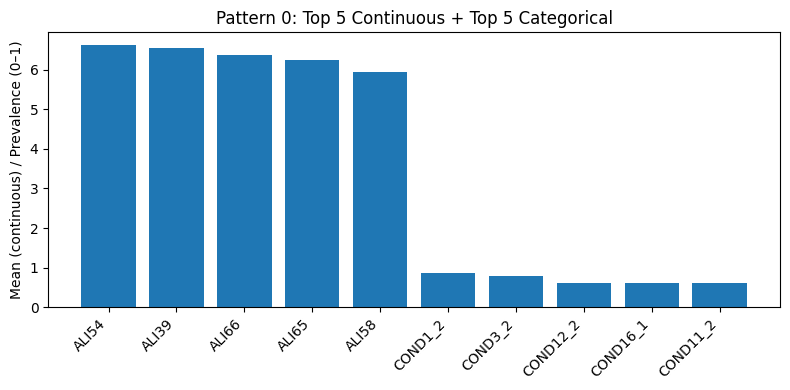

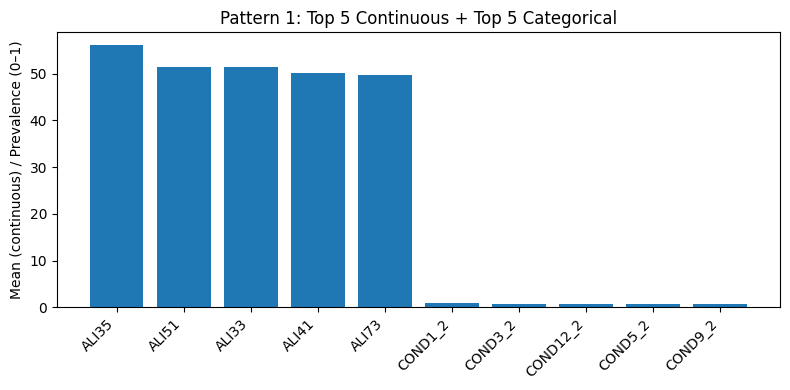

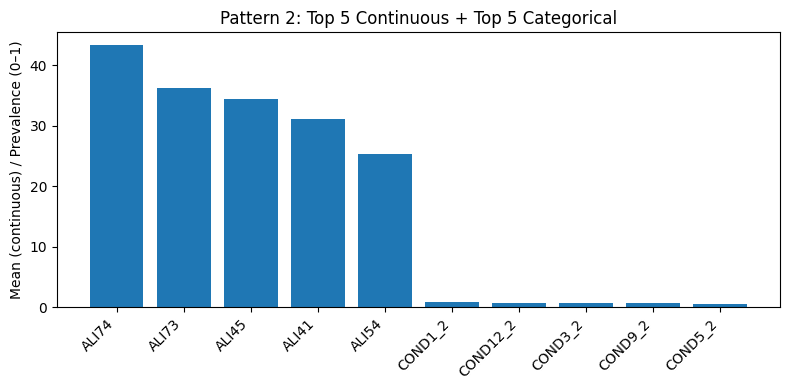

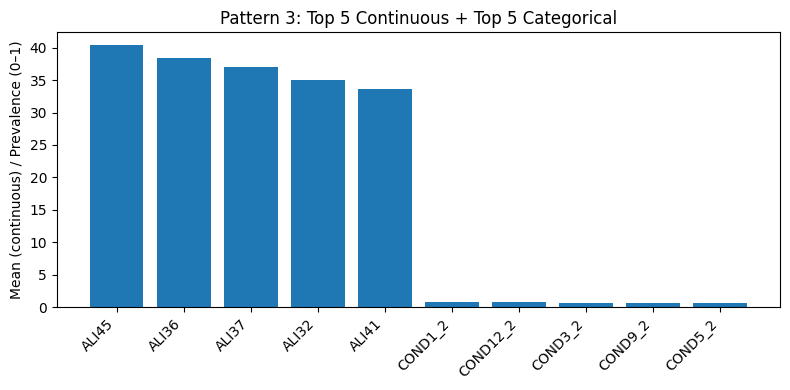

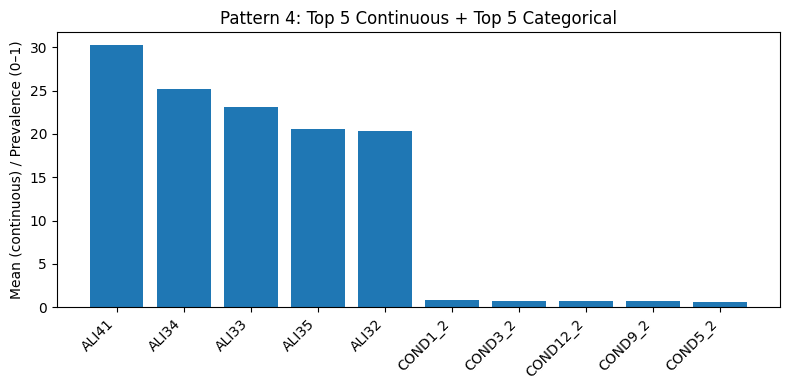

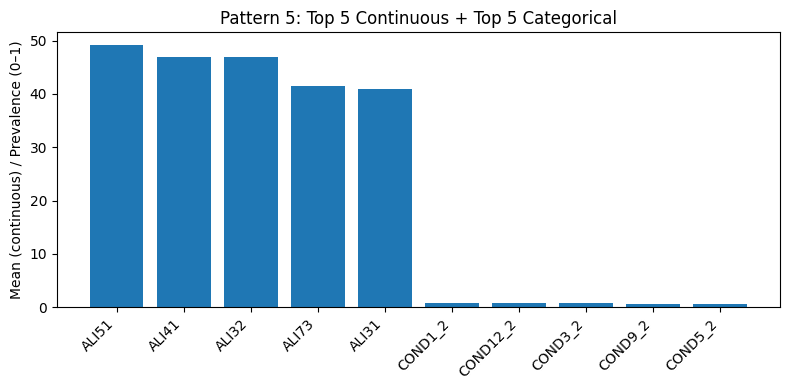

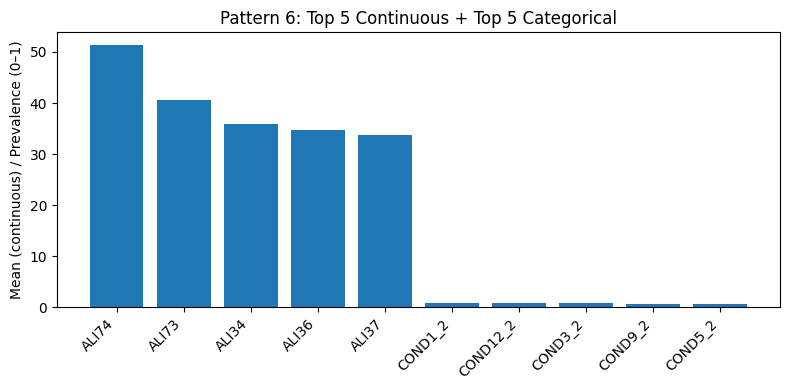

In [107]:
cont_profile = diet_data.groupby('pattern')[continuous_vars].mean()
cat_profile  = diet_data.groupby('pattern')[categorical_vars].mean()

# === Top-5 continuous and top-5 categorical per pattern ===
top5_cont = {
    k: cont_profile.loc[k].nlargest(5).index.tolist()
    for k in cont_profile.index
}
top5_cat = {
    k: cat_profile.loc[k].nlargest(5).index.tolist()
    for k in cat_profile.index
}
top5_mixed = {
    k: top5_cont[k] + top5_cat[k]
    for k in top5_cont
}

# === One bar chart per pattern ===
for pattern_id, features in top5_mixed.items():
    # grab the corresponding mean/prevalence values
    values = pd.concat([cont_profile, cat_profile], axis=1).loc[pattern_id, features]
    
    plt.figure(figsize=(8, 4))
    plt.bar(features, values)
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Pattern {pattern_id}: Top 5 Continuous + Top 5 Categorical")
    plt.ylabel("Mean (continuous) / Prevalence (0–1)")
    plt.tight_layout()
    plt.show()

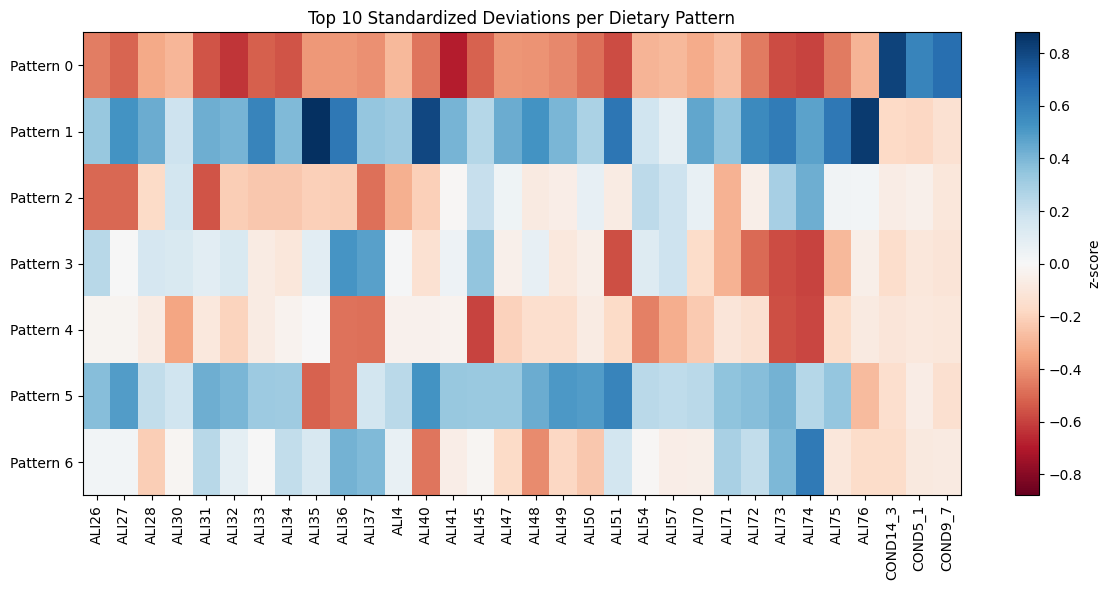

In [109]:
# 1) recompute profile e z-scores come prima
cont_profile = diet_data.groupby('pattern')[continuous_vars].mean()
cat_profile  = diet_data.groupby('pattern')[categorical_vars].mean()
profile      = pd.concat([cont_profile, cat_profile], axis=1)

global_mean = profile.mean(axis=0)
global_std  = diet_data[continuous_vars + categorical_vars].std(axis=0)
z_scores    = (profile - global_mean) / global_std

# 2) estrai Top-10 per |z|
top10_z = {
    k: z_scores.loc[k].abs().nlargest(10).index.tolist()
    for k in z_scores.index
}
vars_to_plot = sorted({v for vs in top10_z.values() for v in vs})
heat = z_scores[vars_to_plot].loc[top10_z.keys()]

# 3) plot con cmap "RdBu"
vmax = np.abs(heat.values).max()
plt.figure(figsize=(12, 6))
plt.imshow(heat, aspect='auto', cmap='RdBu', vmin=-vmax, vmax=+vmax)
plt.colorbar(label='z-score')
plt.yticks(np.arange(len(heat.index)), [f"Pattern {i}" for i in heat.index])
plt.xticks(np.arange(len(vars_to_plot)), vars_to_plot, rotation=90)
plt.title("Top 10 Standardized Deviations per Dietary Pattern")
plt.tight_layout()
plt.show()

# LCA ALTERNATIVE

In [23]:
from sklearn.preprocessing import KBinsDiscretizer

# Definisci il numero di bin
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')

# Applica il discretizzatore alle variabili dietetiche continue
lca_data = data[diet_vars].copy()

In [24]:
# Imputazione dei valori mancanti con la mediana
lca_data_imputed = lca_data.copy()
lca_data_imputed = lca_data_imputed.fillna(lca_data_imputed.median(numeric_only=True))


In [25]:
lca_data_discretized = pd.DataFrame(
    discretizer.fit_transform(lca_data_imputed),
    columns=lca_data_imputed.columns,
    index=lca_data.index
)

/Users/lorispalmarin/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/Users/lorispalmarin/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
/Users/lorispalmarin/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(
/Users/lorispalmarin/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
 

In [27]:
import pandas as pd
from latents import LatentClass
import statsmodels.api as sm
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'latents'

In [ ]:
# Carichiamo il dataset già pronto (assumiamo che si chiami lca_data_ready)
# Per questa simulazione, generiamo un esempio fittizio
# In realtà, userai il tuo dataset già trasformato
lca_data_ready

In [ ]:
# Fit LCA per k classi da 2 a 6
bic_scores = []
aic_scores = []
models = {}

for k in range(2, 7):
    model = LatentClass(n_classes=k, max_iter=1000, tol=1e-6, verbose=0)
    model.fit(lca_data_ready.drop(columns=['case']))
    bic_scores.append(model.bic_)
    aic_scores.append(model.aic_)
    models[k] = model

In [ ]:
# Scegliamo il modello migliore (minimo BIC)
best_k = range(2, 7)[bic_scores.index(min(bic_scores))]
best_model = models[best_k]

In [ ]:
# Aggiungiamo le classi stimate al dataset
lca_data_ready['LCA_CLASS'] = best_model.predict(lca_data_ready.drop(columns=['case']))

In [ ]:
# Prepariamo i dati per regressione logistica
X_model = pd.get_dummies(lca_data_ready['LCA_CLASS'], prefix='class', drop_first=True)
X_model = sm.add_constant(X_model)
y = lca_data_ready['case']

# Fit regressione logistica
logit_model = sm.Logit(y, X_model)
logit_result = logit_model.fit(disp=0)

# Salviamo il summary
logit_summary = logit_result.summary().as_text()

In [ ]:
# Tracciamo BIC e AIC
plt.plot(range(2, 7), bic_scores, marker='o', label='BIC')
plt.plot(range(2, 7), aic_scores, marker='s', label='AIC')
plt.xlabel('Number of Classes (K)')
plt.ylabel('Score')
plt.title('Model Selection Criteria')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
logit_summary
